# Setup

In [73]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import json
from twython import Twython
import time
import nltk
from nltk.tokenize import TweetTokenizer
import re
import random

# Data Scraping

Code below has scraped *all* of Mike Gravel's followers for June 21, 2019 + July 12, 2019. 

*NOTE: It is not necessary to re-run this portion of the notebook. This is just to show work*

In [13]:
# Code below adapated from: https://stackabuse.com/accessing-the-twitter-api-with-python/
# Load Twitter API credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)

# Instantiate an object and provide Twitter credentials
twitter = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET_KEY'], creds['ACCESS_TOKEN'], creds['ACCESS_SECRET_TOKEN'])

In [14]:
def get_followers_json(username):
    # create empty dictionary to accept data
    dict_fol = {'screen_name': [], 'verified': [], 'location': [], 'followers_count': [], 'tweet_text': [], 'retweet_count': [], 'favorite_count': []}  

    # we don't want to dump directly to the graph because we'll get a giant hairball
    # we will want to filter for users with more followers before moving to depth=2 of the social network
    #create loop to page through API results without hitting rate limit
    next_cursor = -1
    timeout = time.time() + 60*60*12 #creates a hard end time for the script to run (12 hrs)

    while(next_cursor):
        if time.time() > timeout: 
            break #ends loop after timeout period
        get_followers = twitter.get_followers_list(screen_name='mikegravel', count = 200, cursor=next_cursor)
        for user in get_followers['users']:  
            dict_fol['screen_name'].append(user['screen_name'])
            dict_fol['verified'].append(user['verified'])
            dict_fol['followers_count'].append(user['followers_count'])
            
            try:
                dict_fol['location'].append(user['location'])
            except:
                dict_fol['location'].append(None) #many users leave this blank
            
            try:
                dict_fol['tweet_text'].append(user['status']['text'])
            except:
                dict_fol['tweet_text'].append(None) #a good number of users have no tweets!
            
            try:
                dict_fol['retweet_count'].append(user['status']['retweet_count'])
            except:
                dict_fol['retweet_count'].append(None)
            
            try:
                dict_fol['favorite_count'].append(user['status']['favorite_count']) 
            except:
                dict_fol['favorite_count'].append(None)
                
        try: 
            time.sleep(65)
            next_cursor = get_followers["next_cursor"]
            print("Getting more of tweets of %s's followers" % username)
            print (time.asctime())
        except:
            break
  

    filename=username + str(time.time()) + "_followers.json"
    
    with open(filename, "w") as file:
        json.dump(dict_fol, file)
        
    print("Saving %s's followers' tweets to JSON file" % username)
    print (time.asctime())
    return dict_fol

In [18]:
get_followers_tweets = get_followers_json('mikegravel')

Getting more of tweets of mikegravel's followers
Fri Jul 12 09:25:37 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:26:44 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:27:50 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:28:56 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:30:03 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:31:09 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:32:15 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:33:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:34:29 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:35:34 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:36:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:37:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:38:53 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 11:27:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:28:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:29:52 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:30:58 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:32:04 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:33:10 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:34:16 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:35:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:36:27 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:37:33 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:38:39 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:39:45 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:40:51 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 13:41:51 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:42:57 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:44:02 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:45:08 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:46:14 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:47:20 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:48:26 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:49:32 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:50:38 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:51:44 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:52:50 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:53:56 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:55:01 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 15:58:14 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 15:59:20 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:00:26 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:01:32 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:02:38 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:03:44 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:04:50 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:05:56 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:07:02 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:08:08 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:09:14 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:10:20 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:11:27 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 18:00:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:01:29 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:02:35 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:03:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:04:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:05:53 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:06:59 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:08:05 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:09:12 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:10:18 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:11:24 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:12:30 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:13:36 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 20:02:35 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:03:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:04:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:05:53 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:06:59 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:08:05 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:09:10 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:10:16 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:11:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:12:28 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:13:34 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:14:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:15:46 2019
Getting more of tweets of mikegravel's

# Organizing the data into a data frame

We have a few different json files saved from different dates. We will combine them into a single corpus using ```pd.concat``` and adding a column for the date and time the data was collected based on the file name.

This code will:

- Open all the files
- Convert JSON to a Python dict file
- Use ``pd.DataFram.from_dict``` to convert the dictionaries to Pandas data frames 
- Add a column with the date the data was scraped
- Concatenate all the data frames into one

In [245]:
#list of files previously scraped using code above (files should be downloaded from git to run locally)
filelist = ['mikegravel1561157054.0137448_followers.json', 'mikegravel1562978529.995827_followers.json']

#use regular expressions to extract the ascii time each file was started (added to filename as part of above code)
import re

df_raw = pd.DataFrame() #create empty data frame

regex = '\d+.\d+'

for filename in filelist:
    with open(filename) as file:
        mgfol = json.load(file)
    match = re.search(regex, filename) #finds timestamp in file name, returns match object
    seconds = float(match[0]) #converts to float
    datetime = time.ctime(seconds) #converts time to readable format
    mgfol['datetime_data_scraped'] = datetime #creates dictionary key-value pair from datetime
    df_fromfile = pd.DataFrame.from_dict(mgfol) #converts to pandas dataframe
    df_raw = pd.concat([df_raw, df_fromfile]) #concetenates dataframes
    print(filename, "added")

mikegravel1561157054.0137448_followers.json added
mikegravel1562978529.995827_followers.json added


In [246]:
#remove rows where the tweet_text is empty
df = df_raw.dropna(subset=['tweet_text'])
df.head(10)

,screen_name,verified,location,followers_count,tweet_text,retweet_count,favorite_count,datetime_data_scraped
0,andyverderosa,True,nyc via sf,1369,I mean who among us hasn’t called off one or t...,0.0,4.0,Fri Jun 21 18:44:14 2019
1,mathrok,False,"Wisconsin, USA",817,@OneNationOrg You know a response video with t...,0.0,3.0,Fri Jun 21 18:44:14 2019
2,g_stetz,False,,83,RT @halaljew: it owns that Lisa Simpson has a ...,17783.0,0.0,Fri Jun 21 18:44:14 2019
5,maikiko,False,Los Angeles,415,RT @BhamDSA: There's a lot of spotlights on Al...,256.0,0.0,Fri Jun 21 18:44:14 2019
6,a_huge_goku,False,"Long Island, NY",175,Board man gets paid,0.0,2.0,Fri Jun 21 18:44:14 2019
9,KrishMohanHaha,False,"Pittsburgh, PA",1552,"Hey @shoe0nhead, dig your #Aurthur video, but ...",0.0,2.0,Fri Jun 21 18:44:14 2019
10,end_it_pls,False,Republic of Croatia,44,@py_bun Rad from Walmart https://t.co/UZcW7dtrJo,0.0,0.0,Fri Jun 21 18:44:14 2019
11,RalphCollins4,False,,365,Join the #BDS movement as the crimes against a...,0.0,0.0,Fri Jun 21 18:44:14 2019
12,ComradeAndy1848,False,,78,RT @MikeGravel: The majority of people in this...,938.0,0.0,Fri Jun 21 18:44:14 2019
13,soolaymahn,False,,7,@realDonaldTrump Lol where were you during Vie...,0.0,0.0,Fri Jun 21 18:44:14 2019


# Data Exploration

What tweets are in the sample?

In [78]:
df['tweet_text'].value_counts()

RT @MikeGravel: We will give $2,000 to a random person who follows this account and retweets this tweet by July 10—we're announcing a promo…      952
RT @thejalatucker: If you DID NOT learn about Juneteenth in school, RT this, I’m really trying to see something.                                  391
RT @MikeGravel: hey @JoeBiden turn on your tv https://t.co/IunLwGvAyZ                                                                             285
RT @AndrewYang: I will give $1,000/mo for the next 12 months FREE to someone who retweets this and follows me by July 4th 😃 Let's show why…       161
RT @MikeGravel: Remember for a moment that we live in a country where one idiotic, authoritarian man has unilateral control of whether we e…      147
RT @IlhanMN: Just as in Iraq, aggressors are using illegitimate pretexts to beat the drums of war.\n\nJust as in Iraq, our media is taking th…    144
RT @MikeGravel: we made it https://t.co/S0DmHjr9Zu                                                  

What is the distribution of retweets and likes?

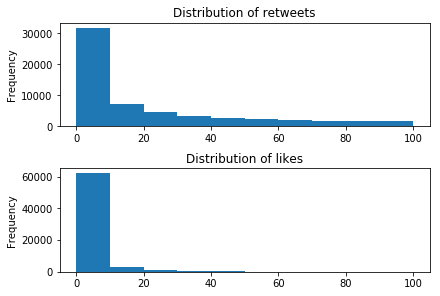

In [227]:
#create rows for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

#plot non-zero distribution of retweets and likes
df[df['retweet_count']>0].retweet_count.plot(ax = axes[0], kind='hist',  range=(0,100))
df[df['favorite_count']>0].favorite_count.plot(ax = axes[1], kind='hist', range=(0,100))

axes[0].set_title('Distribution of retweets')
axes[1].set_title('Distribution of likes')


plt.show()


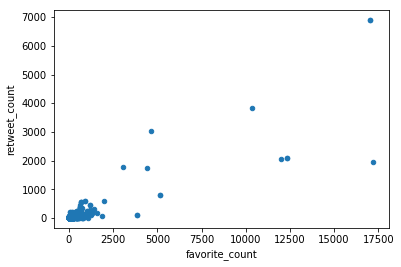

In [228]:
df[df['favorite_count']>0].plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter')
plt.show()

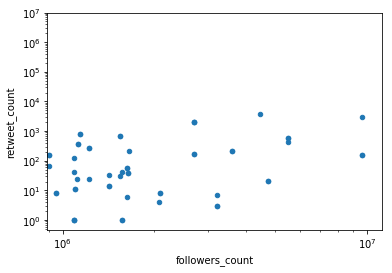

In [229]:
fig = df[df['retweet_count']>0].plot( x = 'followers_count', y = 'retweet_count', kind = 'scatter')
fig.set_xscale('log')
fig.set_yscale('log')
plt.show()

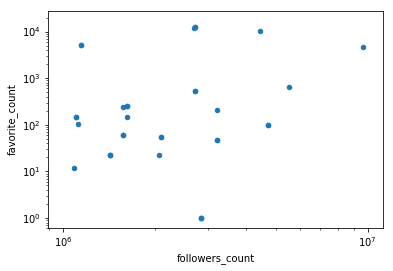

In [230]:
fig = df[df['favorite_count']>0].plot(x = 'followers_count', y = 'favorite_count', kind = 'scatter')
fig.set_xscale('log')
fig.set_yscale('log')
plt.show()

A few things are appararent from this set of distributions:

1. Tweets in the sample are more likely to retweeted than liked
2. It's very hard to get more than 10 of either
3. Retweets seem to depend on the number of followers, but likes are a bit less correlated

Therefore, we will choose likes as the condition most likely to be based on the content of the tweet. We will divide the distribution of likes into 0 , low (bottom 90%), med (90-99 percentile), and high (top 1%)

# Creating the Corpus


In [238]:
#find quantiles
cutoffs = df[df['favorite_count']>0].favorite_count.quantile([.90, .99]) #creates Pandas series for 90th and 99th percentile value

#label assignment
labels = ['Zero', 'Low', 'Med', 'High']

def labeler(count):
    label = ''
    if count == 0:
        label = labels[0] #labels 0 data as None
    
    elif count > 0 and count < cutoffs.iloc[0]:
        label = labels[1] #labels bottom 90% 
    
    elif count >= cutoffs.iloc[0] and count < cutoffs.iloc[1]:
        label = labels[2] #labels 90-99 percentile
    
    else:
        label = labels[3] #labels top 1%
    
    return label

l = lambda x: labeler(x)

sub_df = df[['tweet_text', 'favorite_count']]
sub_df = sub_df.dropna(subset=['favorite_count'])

sub_df.loc[:,'Likes'] = pd.Series(sub_df['favorite_count'].map(l))

subset = sub_df[['tweet_text', 'Likes']]

corpus = [tuple(x) for x in subset.values]
corpus[0:3]

[('I mean who among us hasn’t called off one or two proverbial drone strikes that we ourselves initially ordered?',
  'Low'),
 ('@OneNationOrg You know a response video with testimonies of the perpetual horror stories our for-profit healthcare… https://t.co/CrqOtCR2aQ',
  'Low'),
 ('RT @halaljew: it owns that Lisa Simpson has a better understanding of the function that police serve in a capitalist society then the major…',
  'Zero')]

In [243]:
random.shuffle(corpus) #shuffle the original corpus of labeled tweets

# Create a function to return a new training and dev-test mix of the corpus for each iteration of the model
def resampler(corpus):
    
    n = 1000 #length of test sets
    
    #prints message to explain output
    print("Resampler returns 3 sliced, resampled subsets of the corpus:")
    print("\tThe first returned value is the remixed training corpus, length is variable")
    print("\tThe second returned value is the remixed dev-test corpus, length is %d" % n)
    print("\tThe third returned value is the un-remixed test set, length is %d" % n)
     
        
    #reserve first 100 for the final test    
    test_corpus = corpus[:n] 
    
    #create a copy of the dev_set to preserve the original test set before shuffling
    dev_set = corpus[n:] 
    random.shuffle(dev_set) #remix before re-slicing
    
    #re-cut re-shuffled development set into dev-test set (len 100) and training set (remainder)
    dev_test_corpus = dev_set[:n]
    train_corpus = dev_set[n:]
    
    #prints sample of sets
    print("Training Corpus Sample: ",train_corpus[0:3], ", Length: ", len(train_corpus)) 
    print("Dev-Test Corpus Sample: ",dev_test_corpus[0:3], ", Length: ", len(dev_test_corpus)) 
    print("Test Corpus Sample: ", test_corpus[0:3], ", Length: ", len(test_corpus))
    
    return train_corpus, dev_test_corpus, test_corpus

In [244]:
train_corpus, dev_test_corpus, test_corpus = resampler(corpus)

Resampler returns 3 sliced, resampled subsets of the corpus:
	The first returned value is the remixed training corpus, length is variable
	The second returned value is the remixed dev-test corpus, length is 1000
	The third returned value is the un-remixed test set, length is 1000
Training Corpus Sample:  [('RT @KrangTNelson: she deleted it right after I RT’d but lol https://t.co/E8zf8VFwsg', 'Zero'), ('RT @JackPosobiec: Weird how Epstein was able to escape federal charges throughout 2009-2017', 'Zero'), ("RT @BernieSanders: During the Wall Street crash an estimated 15 million families lost their homes.\n \nLloyd Blankfein didn't lose his home o…", 'Zero')] , Length:  290458
Dev-Test Corpus Sample:  [('RT @napalmmeth: In 2010, the founder of 4chan, moot, had to testify in front of a court in a trial regarding the 2008 hacking of Sarah Pali…', 'Zero'), ('RT @briebriejoy: For a refresher: our campaign manager, @fshakir, is the first Muslim campaign manager in US presidential history. \n\n

# Training the model

## Extracting features & creating the labeled data
The goal is to predict the number of likes and retweets based on the content of each tweet

In [249]:
# Define function to process the names through feature extractor
def feature_ext(feature_func, train_corpus, dev_test_corpus):
    
    #then, extract features from the names slices
    train_set = [(feature_func(data), label) for (data, label) in train_corpus]
    devtest_set = [(feature_func(data), label) for (data, label) in dev_test_corpus]

    
    return train_set, devtest_set

In [252]:
def test_model(train_set, test_set):
    
    # Train on the training set using the naiveBayes classifier built in to nltk
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    
    # Test the accuracy of the classifier on the test data
    # Note: During model development, this should be the *dev_test* data
    a = round(nltk.classify.accuracy(classifier, test_set), 4)*100
    
    # Format results as a 2 digit decimal
    accuracy = f'{a:.2f}'
    
    # Print message with results
    print("\n")
    print("Model is %s percent accurate" % accuracy)
    print("\n")
    
    # Examine classifier to determine which last letter is most effective for predicting gender
    print(classifier.show_most_informative_features(10))
    
    return classifier

## Start testing different features
First up, tweet length

In [247]:
def tweet_features(tweet):
    return {'length': len(tweet)}

In [253]:
train_set, devtest_set = feature_ext(tweet_features, train_corpus, dev_test_corpus)
tweet_length = test_model(train_set, devtest_set)



Model is 75.40 percent accurate


Most Informative Features
                  length = 147              High : Low    =     50.6 : 1.0
                  length = 18                Low : Med    =      9.8 : 1.0
                  length = 148              Zero : Low    =      9.3 : 1.0
                  length = 24                Low : Med    =      9.1 : 1.0
                  length = 7                 Med : Zero   =      5.6 : 1.0
                  length = 49               High : Med    =      5.6 : 1.0
                  length = 144              High : Low    =      5.4 : 1.0
                  length = 141               Med : Low    =      5.3 : 1.0
                  length = 142               Med : Low    =      5.2 : 1.0
                  length = 13                Low : Med    =      4.8 : 1.0
None


Next, test presence or absence of certain tokens

In [254]:
import nltk
from nltk.tokenize import TweetTokenizer 


def tweet_features(tweet):
    tk = TweetTokenizer()
    tokens = tk.tokenize(tweet)
    return {'length': len(tweet), 'tokens': tokens}

In [255]:
train_corpus, dev_test_corpus, test_corpus = resampler(corpus)
train_set, devtest_set = feature_ext(tweet_features, train_corpus, dev_test_corpus)
tweet_tokens = test_model(train_set, devtest_set)

Resampler returns 3 sliced, resampled subsets of the corpus:
	The first returned value is the remixed training corpus, length is variable
	The second returned value is the remixed dev-test corpus, length is 1000
	The third returned value is the un-remixed test set, length is 1000
Training Corpus Sample:  [('RT @dick_nixon: Gorka is a type you saw in London a lot before and after the war. Displaced Hungarian something-or-other. Pistols. Nobody k…', 'Zero'), ('@read_demon fax', 'Low'), ("RT @BernieSanders: I'm running for president. I am asking you to join me today as part of an unprecedented and historic grassroots campaign…", 'Zero')] , Length:  290458
Dev-Test Corpus Sample:  [('RT @MsBeckyLittle: In the 1930s, the Los Angeles Welfare Department decided to start deporting hospital patients of Mexican descent. One of…', 'Zero'), ('Channeled so much Zizek devouring two hot dogs simultaneously energy today and it felt painfully right', 'Low'), ('@as_a_woman U think your so transgressive,

TypeError: unhashable type: 'list'